# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constant

In [2]:
FEATURES_256X256_PATH = '/kaggle/input/key-images/features_256x256.csv'
FEATURES_512X512_PATH = '/kaggle/input/key-images/features_512x512.csv'

# Helpers

In [3]:
def bit_unpacking(packed_image, width, height):
    # Calculate the number of pixels per byte
    bits_per_pixel = 1
    bits_per_byte = 8
    pixels_per_byte = bits_per_byte // bits_per_pixel

    # Reshape the packed image to 1D array
    packed_image = packed_image.ravel()

    # Calculate the total number of bytes needed to store the unpacked image
    total_pixels = width * height
    total_bytes = total_pixels // pixels_per_byte
    if total_pixels % pixels_per_byte != 0:
        total_bytes += 1

    # Pad the packed image with zeros to ensure it has the correct length
    packed_image = np.pad(packed_image, (0, total_bytes * pixels_per_byte - len(packed_image)), mode='constant')

    # Unpack the image
    unpacked_image = np.unpackbits(packed_image)

    # Reshape the unpacked image to the original shape
    unpacked_image = unpacked_image[:total_pixels].reshape((height, width))

    return unpacked_image


def plt_img(img_data, cmap='viridis'):
    '''
    cmap:
      * 'gray' (Grayscale)
      * 'binary' (Binary)
    '''
    plt.imshow(img_data, cmap=cmap)
    plt.axis('on')
    plt.show()

In [15]:
def euclidean_distance(img1, img2):
    # Flatten the images to 1D arrays
    img1_flat = img1.flatten()
    img2_flat = img2.flatten()
    
    # Calculate the Euclidean distance
    distance = np.linalg.norm(img1_flat - img2_flat)
    
    # Max possible distance for binary images
    max_distance = np.sqrt(np.sum((1)**2)) * img1.size  
    similarity = 1 - (distance / max_distance)
    
    return similarity


def hamming_distance(img1, img2):
    # Flatten the images to 1D arrays
    img1_flat = img1.flatten()
    img2_flat = img2.flatten()
    
    # Calculate the Hamming distance
    hamming_dist = np.count_nonzero(img1_flat != img2_flat)
    
    # Normalize the distance to obtain similarity score
    max_distance = img1.size  # Max possible Hamming distance for binary images
    similarity = 1 - (hamming_dist / max_distance)
    
    return similarity


def cosine_similarity(img1, img2):
    # Flatten the images to 1D arrays
    img1_flat = img1.flatten()
    img2_flat = img2.flatten()
    
    # Calculate dot product
    dot_product = np.dot(img1_flat, img2_flat)
    
    # Calculate magnitudes
    magnitude_img1 = np.linalg.norm(img1_flat)
    magnitude_img2 = np.linalg.norm(img2_flat)
    
    # Calculate cosine similarity
    cosine_sim = dot_product / (magnitude_img1 * magnitude_img2)
    
    return cosine_sim

# Unpack bits of all images

In [6]:
df = pd.read_csv(FEATURES_256X256_PATH)
images_data = []

for _, row in df.iterrows():
    # Convert data into uint8
    image_raw_bits = (row.values).astype(np.uint8)
    
    # Unpack bits to 256x256
    image_bits = bit_unpacking(image_raw_bits, 256, 256)
    
    # Append image_bits data
    images_data.append(image_bits)

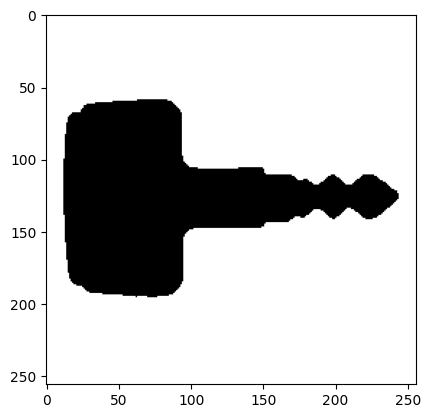

In [7]:
plt_img(images_data[0], cmap='binary')

## Calculate Similarity Using (Euclidean Distance)

* Euclidean distance measures the straight-line distance between two points in Euclidean space. In the context of feature vectors extracted from binary images, each feature represents a dimension in the space.
* When comparing two feature vectors (representing binary images), Euclidean distance calculates the distance between them in this multi-dimensional space.
* Lower Euclidean distance indicates greater similarity between the feature vectors.

In [8]:
num_images = len(images_data)
confusion_matrix = np.zeros((num_images, num_images))

for i in range(num_images):
    for j in range(num_images):
        confusion_matrix[i, j] = euclidean_distance(images_data[i], images_data[j])

In [9]:
df_confusion_matrix = pd.DataFrame(confusion_matrix, 
                                   index=range(len(images_data)), 
                                   columns=range(len(images_data)))
df_confusion_matrix

,0,1,2,3,4,5,6,7,8
0,1.000000,0.907919,0.911269,0.874575,0.887494,0.838487,0.860137,0.938346,0.905643
1,0.805567,1.000000,0.953633,0.892519,0.884902,0.832145,0.878751,0.925455,0.895085
2,0.807799,0.956497,1.000000,0.892801,0.885099,0.832461,0.878377,0.925455,0.899733
3,0.735069,0.808469,0.807956,1.000000,0.821480,0.770959,0.843100,0.841563,0.854048
4,0.787735,0.872247,0.871420,0.900949,1.000000,0.815515,0.886624,0.949711,0.910335
5,0.794586,0.877695,0.877077,0.881210,0.866792,1.000000,0.865041,0.891675,0.853115
6,0.746218,0.826163,0.825164,0.877509,0.840944,0.783323,1.000000,0.854983,0.863758
7,0.728020,0.784585,0.783988,0.797967,0.799246,0.743489,0.784690,1.000000,0.820128
8,0.745742,0.806543,0.808351,0.849704,0.822842,0.752592,0.828354,0.866112,1.000000


## Calculate Similarity Using (Hamming Distance)

* Hamming distance measures the number of positions at which corresponding symbols (elements) in two equal-length sequences are different.
* In the context of binary images, Hamming distance can be used to compare binary patterns directly.
* Each bit (pixel) in the binary images corresponds to a symbol in the sequence, and the Hamming distance calculates how many of these symbols differ between the two sequences.
* Lower Hamming distance indicates greater similarity between the binary images.

In [11]:
num_images = len(images_data)
confusion_matrix = np.zeros((num_images, num_images))

for i in range(num_images):
    for j in range(num_images):
        confusion_matrix[i, j] = hamming_distance(images_data[i], images_data[j])
        
df_confusion_matrix = pd.DataFrame(confusion_matrix, 
                                   index=range(len(images_data)), 
                                   columns=range(len(images_data)))
df_confusion_matrix

,0,1,2,3,4,5,6,7,8
0,1.000000,0.953354,0.954834,0.913406,0.941833,0.931183,0.915375,0.921616,0.925873
1,0.953354,1.000000,0.995926,0.951385,0.970200,0.956528,0.954727,0.947632,0.951187
2,0.954834,0.995926,1.000000,0.951248,0.970032,0.956482,0.954285,0.947372,0.952850
3,0.913406,0.951385,0.951248,1.000000,0.957993,0.932907,0.960068,0.933563,0.955765
4,0.941833,0.970200,0.970032,0.957993,1.000000,0.947815,0.961548,0.956833,0.960266
5,0.931183,0.956528,0.956482,0.932907,0.947815,1.000000,0.934326,0.921860,0.916565
6,0.915375,0.954727,0.954285,0.960068,0.961548,0.934326,1.000000,0.932083,0.951599
7,0.921616,0.947632,0.947372,0.933563,0.956833,0.921860,0.932083,1.000000,0.949326
8,0.925873,0.951187,0.952850,0.955765,0.960266,0.916565,0.951599,0.949326,1.000000


## Calculate Similarity Using (Cosine Similarity)

* Cosine similarity measures the cosine of the angle between two vectors. It's a measure of similarity between two non-zero vectors of an inner product space.
* In the context of feature vectors extracted from binary images, cosine similarity measures the similarity in direction between the vectors.
* Cosine similarity is robust to changes in magnitude and is often used when the magnitude of the vectors is not important.
* Higher cosine similarity indicates greater similarity between the feature vectors.

In [16]:
num_images = len(images_data)
confusion_matrix = np.zeros((num_images, num_images))

for i in range(num_images):
    for j in range(num_images):
        confusion_matrix[i, j] = cosine_similarity(images_data[i], images_data[j])
        
df_confusion_matrix = pd.DataFrame(confusion_matrix, 
                                   index=range(len(images_data)), 
                                   columns=range(len(images_data)))
df_confusion_matrix

,0,1,2,3,4,5,6,7,8
0,0.014485,0.002024,0.006000,0.014470,0.004361,0.016977,0.004649,0.015625,0.003593
1,0.002024,0.005751,0.015525,0.017077,0.001731,0.008177,0.010026,0.007021,0.013215
2,0.006000,0.015525,0.007012,0.017385,0.001956,0.008678,0.009554,0.007016,0.018249
3,0.014470,0.017077,0.017385,0.017819,0.005870,0.003479,0.020096,0.006519,0.021649
4,0.004361,0.001731,0.001956,0.005870,0.009859,0.017355,0.019658,0.002358,0.008474
5,0.016977,0.008177,0.008678,0.003479,0.017355,0.012761,0.011522,0.015225,0.018236
6,0.004649,0.010026,0.009554,0.020096,0.019658,0.011522,0.006147,0.007480,0.014835
7,0.015625,0.007021,0.007016,0.006519,0.002358,0.015225,0.007480,0.018240,0.003137
8,0.003593,0.013215,0.018249,0.021649,0.008474,0.018236,0.014835,0.003137,0.010649
